In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("FINAL_FROM_DF.csv")

# Extract the relevant features
df['TARGET'] = (df['CLOSE'] > df['PREVCLOSE']).astype(int)
features = df[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'LAST', 'PREVCLOSE', 'TOTTRDQTY', 'TOTTRDVAL']]
target = df['TARGET']

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, shuffle=False)

In [4]:
# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [8]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
21161/21161 [==============================] - 27s 1ms/step - loss: 0.6895 - accuracy: 0.5384
Epoch 2/100
21161/21161 [==============================] - 27s 1ms/step - loss: 0.6886 - accuracy: 0.5414
Epoch 3/100
21161/21161 [==============================] - 28s 1ms/step - loss: 0.6881 - accuracy: 0.5427
Epoch 4/100
21161/21161 [==============================] - 26s 1ms/step - loss: 0.6877 - accuracy: 0.5435
Epoch 5/100
21161/21161 [==============================] - 26s 1ms/step - loss: 0.6873 - accuracy: 0.5456
Epoch 6/100
21161/21161 [==============================] - 26s 1ms/step - loss: 0.6869 - accuracy: 0.5477
Epoch 7/100
21161/21161 [==============================] - 26s 1ms/step - loss: 0.6862 - accuracy: 0.5524
Epoch 8/100
21161/21161 [==============================] - 26s 1ms/step - loss: 0.6845 - accuracy: 0.5598
Epoch 9/100
21161/21161 [==============================] - 26s 1ms/step - loss: 0.6803 - accuracy: 0.5737
Epoch 10/100
21161/21161 [====================

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

5291/5291 [==============================] - 5s 807us/step - loss: 0.3656 - accuracy: 0.8647
Test Loss: 0.36556389927864075
Test Accuracy: 0.8646806478500366


In [11]:
model.save("RNN_model.h5")

In [7]:
# model = load_model("RNN_model.h5")

5291/5291 [==============================] - 3s 582us/step
Accuracy: 0.8646806197978509
Confusion Matrix:
[[88282  3841]
 [19066 58092]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89     92123
           1       0.94      0.75      0.84     77158

    accuracy                           0.86    169281
   macro avg       0.88      0.86      0.86    169281
weighted avg       0.88      0.86      0.86    169281



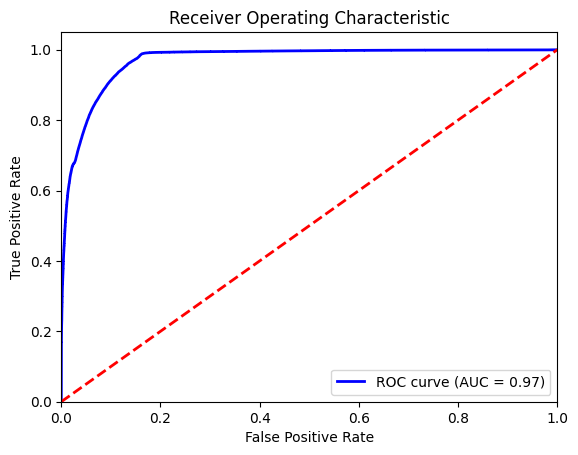

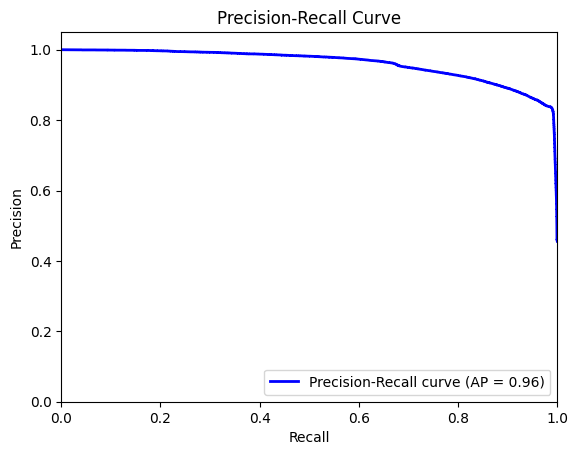

In [10]:


#Obtain predicted probabilities for positive class (class 1)
# X_test_4_feat = X_test[:, :, :4]
y_prob = model.predict(X_test)[:, 0]

# Convert probabilities to binary predictions (0 or 1)
y_pred = np.where(y_prob > 0.5, 1, 0)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


In [15]:
mse = mean_squared_error(y_test, y_prob)
rmse = mean_squared_error(y_test, y_prob, squared=False)
r2 = r2_score(y_test, y_prob)
mae = mean_absolute_error(y_test, y_prob)
print("MSE: ", mse)
print("R2: ", r2)
print("RMSE:", rmse)
print("MAE:", mae)

MSE:  0.10975320626548382
R2:  0.5575292017272079
RMSE: 0.3312902145634305
MAE: 0.2656499914350679


## Parameter Tuining

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_model(units=50, activation='relu', optimizer='adam', loss='binary_crossentropy'):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(1, X_train.shape[2])))
    model.add(Dense(units=1, activation=activation))
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

In [ ]:
param_grid = {
    'units': [50, 100, 200],  # Number of LSTM units
    'batch_size': [32, 64, 128],  # Batch size
    'epochs': [25, 50, 100],  # Number of epochs
    'activation': ['relu', 'sigmoid', 'tanh'],  # Activation functions to try
    'optimizer': ['SGD', 'RMSprop', 'Adam'],  # Optimizers to try
    'loss': ['binary_crossentropy', 'mean_squared_error', 'hinge']
}

# Create the model
model = KerasClassifier(build_fn=create_model)

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# Get the best hyperparameters
best_params = grid_result.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_result.best_estimator_.model
print("Best Model Architecture:")
best_model.summary()